In [1]:
! pip install -r requirements.txt
from pruning_optimization import pruning_optimization
! pip install pandas
! pip install matplotlib
import seedb
import matplotlib

Exception ignored in: <_io.FileIO name=4 mode='wb' closefd=True>
Traceback (most recent call last):
  File "C:\Users\ashwi\anaconda3\lib\site-packages\IPython\utils\_process_win32.py", line 145, in system
    return process_handler(cmd, _system_body)
Exception ignored in: <_io.FileIO name=5 mode='rb' closefd=True>
Traceback (most recent call last):
  File "C:\Users\ashwi\anaconda3\lib\site-packages\IPython\utils\_process_win32.py", line 145, in system
    return process_handler(cmd, _system_body)
Exception ignored in: <_io.FileIO name=6 mode='rb' closefd=True>
Traceback (most recent call last):
  File "C:\Users\ashwi\anaconda3\lib\site-packages\IPython\utils\_process_win32.py", line 145, in system
    return process_handler(cmd, _system_body)


Exception ignored in: <_io.FileIO name=4 mode='wb' closefd=True>
Traceback (most recent call last):
  File "C:\Users\ashwi\anaconda3\lib\site-packages\IPython\utils\_process_win32.py", line 145, in system
    return process_handler(cmd, _system_body)
Exception ignored in: <_io.FileIO name=5 mode='rb' closefd=True>
Traceback (most recent call last):
  File "C:\Users\ashwi\anaconda3\lib\site-packages\IPython\utils\_process_win32.py", line 145, in system
    return process_handler(cmd, _system_body)
Exception ignored in: <_io.FileIO name=6 mode='rb' closefd=True>
Traceback (most recent call last):
  File "C:\Users\ashwi\anaconda3\lib\site-packages\IPython\utils\_process_win32.py", line 145, in system
    return process_handler(cmd, _system_body)


# Get interesting visualization 

In [2]:
fam_set = seedb.generate_fams()
print(f"Length of fam_set = {len(fam_set)}")

top_k_interesting_visualizations = pruning_optimization(fam_set)
print(top_k_interesting_visualizations)

Length of fam_set = 225
225
225
6
6
6
6
6
6
6
6
OrderedDict([(('avg', 'native_country', 'capital_loss'), 351.0010386298425), (('avg', 'native_country', 'capital_gain'), 240.6963589445449), (('min', 'native_country', 'capital_loss'), 129.6186243655107), (('max', 'relationship', 'capital_loss'), 101.56850603971378), (('avg', 'relationship', 'capital_loss'), 98.29212959874633)])



SELECT q1.aggregate, q1.val, q2.val from (
(SELECT native_country as aggregate, avg(capital_loss) as val from census_income.adult where marital_status in 
('Married-civ-spouse', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse', 'Separated') group by native_country) q1 
right outer join 
(SELECT native_country as aggregate, avg(capital_loss) as val from census_income.adult where marital_status in 
('Divorced','Never-married') group by native_country) q2
on q1.aggregate = q2.aggregate);



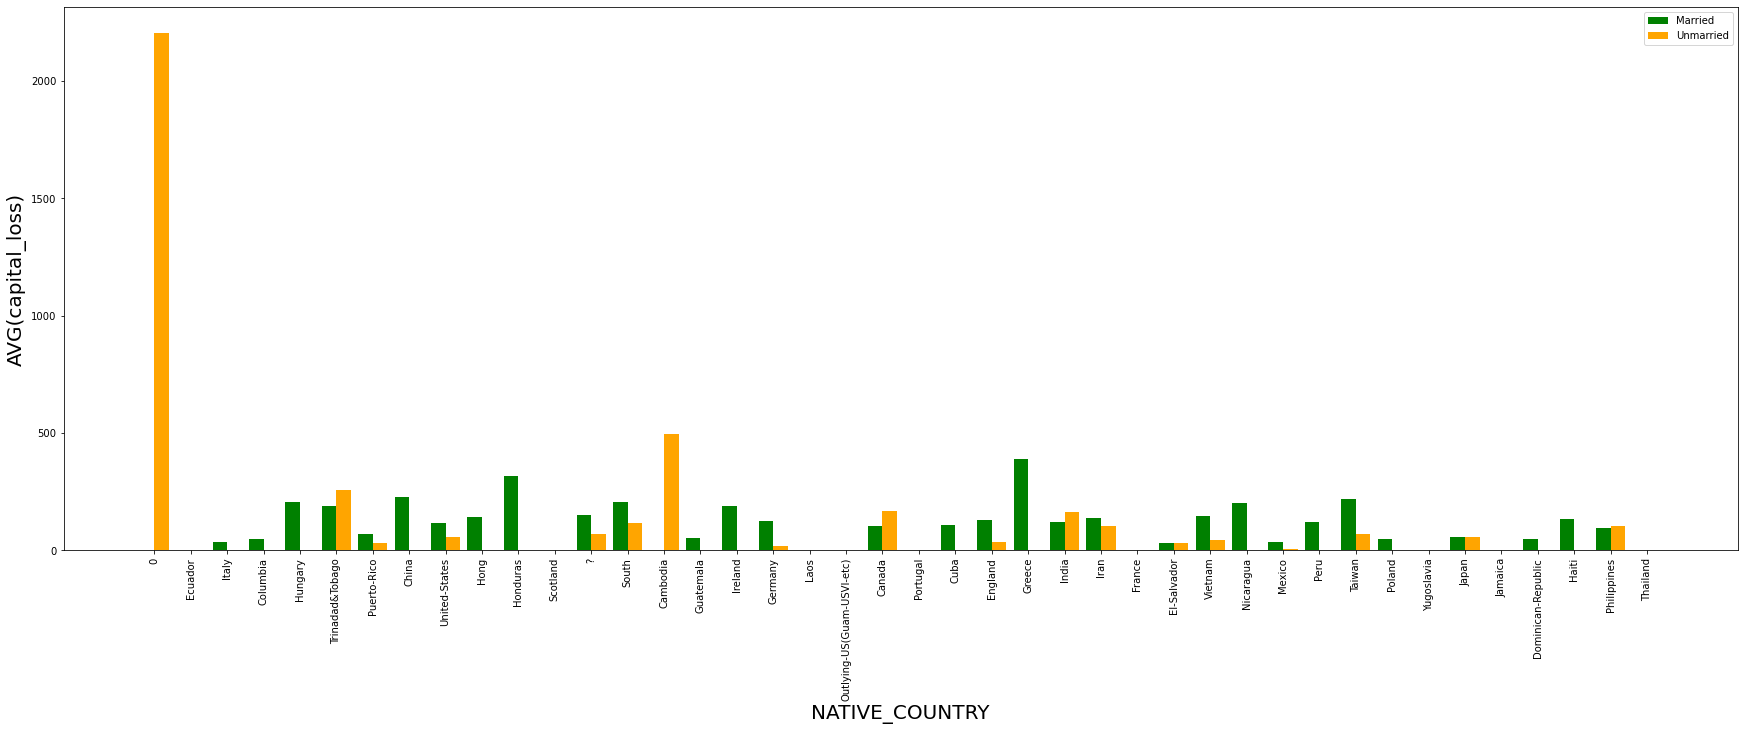


SELECT q1.aggregate, q1.val, q2.val from (
(SELECT native_country as aggregate, avg(capital_gain) as val from census_income.adult where marital_status in 
('Married-civ-spouse', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse', 'Separated') group by native_country) q1 
right outer join 
(SELECT native_country as aggregate, avg(capital_gain) as val from census_income.adult where marital_status in 
('Divorced','Never-married') group by native_country) q2
on q1.aggregate = q2.aggregate);



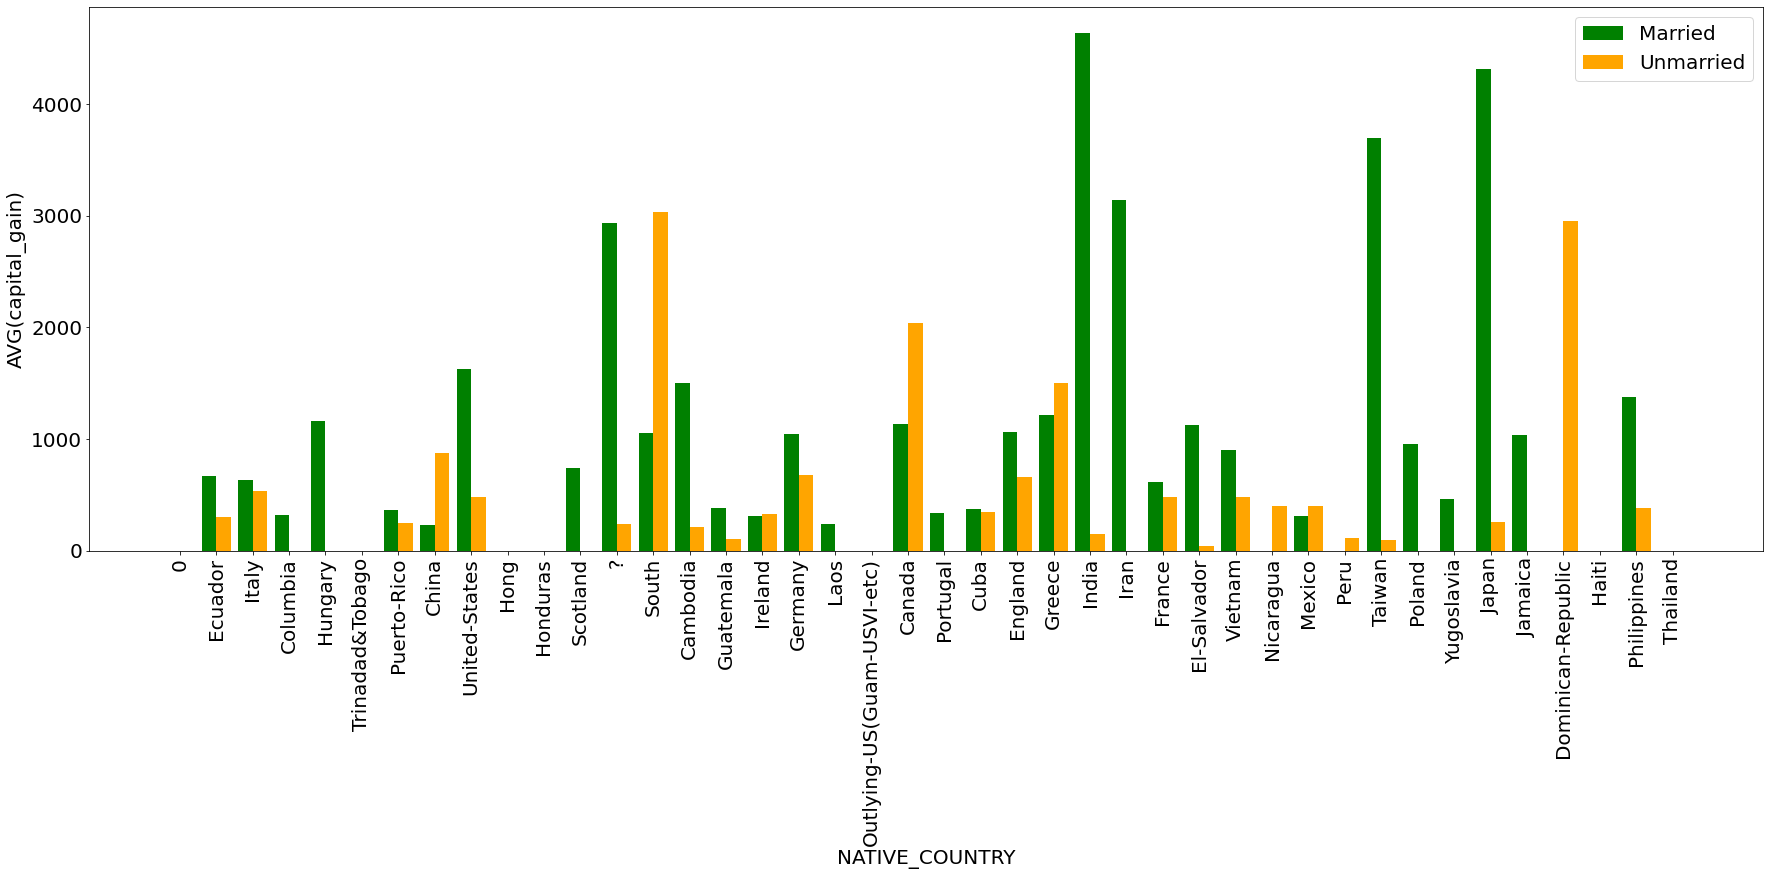


SELECT q1.aggregate, q1.val, q2.val from (
(SELECT native_country as aggregate, min(capital_loss) as val from census_income.adult where marital_status in 
('Married-civ-spouse', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse', 'Separated') group by native_country) q1 
right outer join 
(SELECT native_country as aggregate, min(capital_loss) as val from census_income.adult where marital_status in 
('Divorced','Never-married') group by native_country) q2
on q1.aggregate = q2.aggregate);



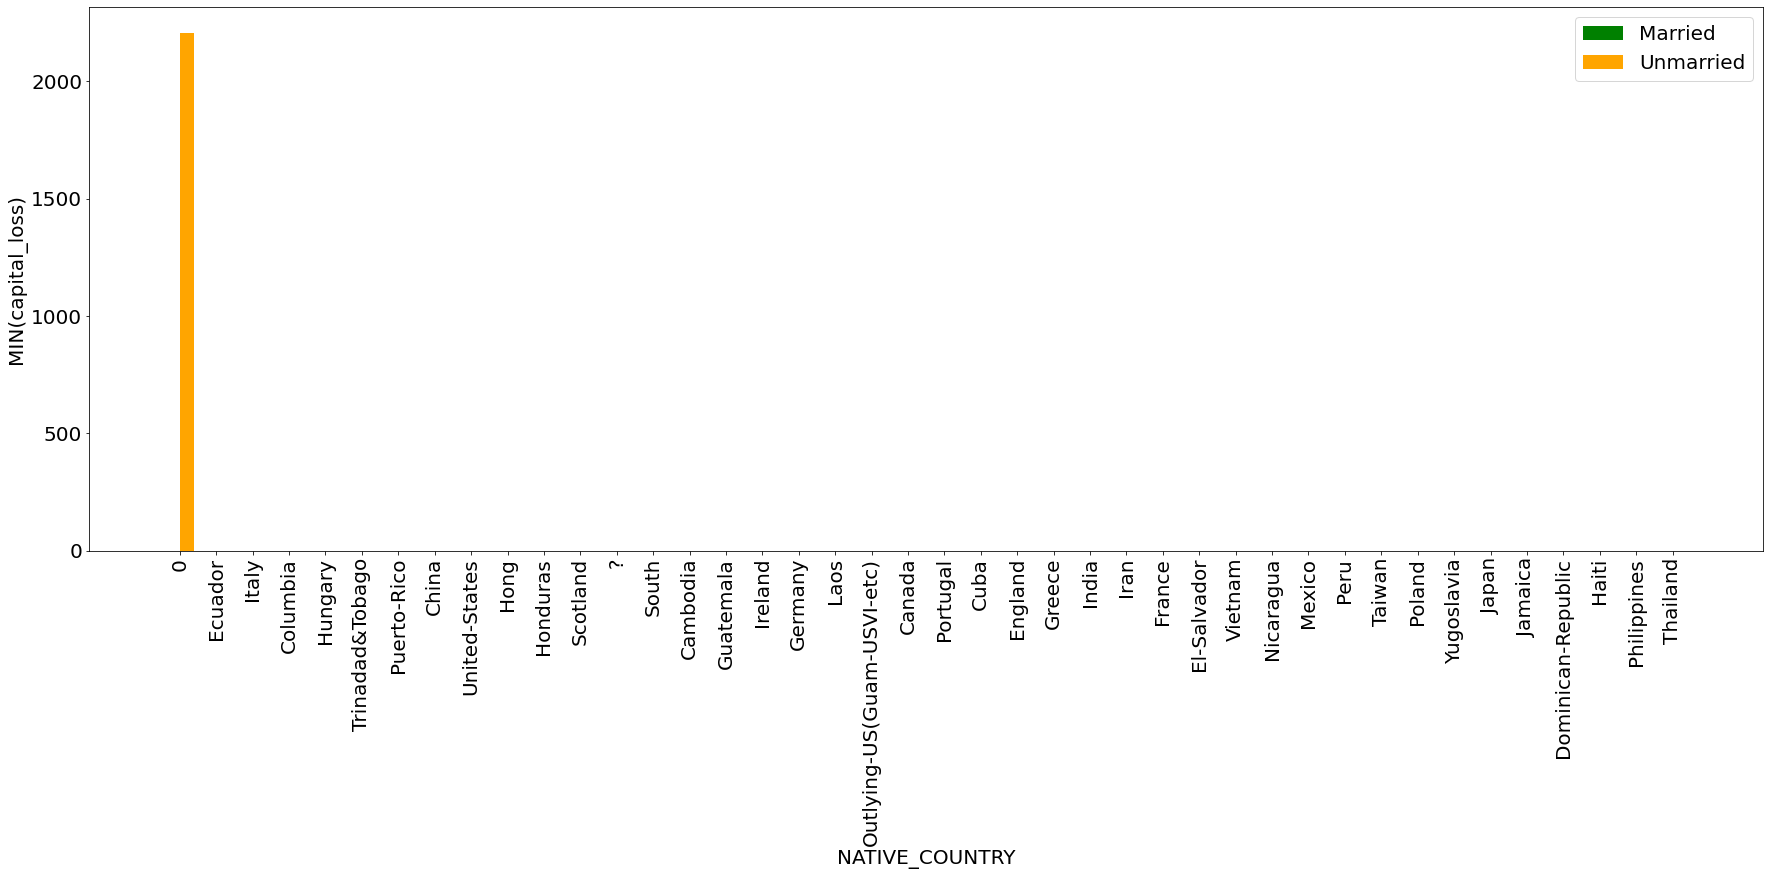


SELECT q1.aggregate, q1.val, q2.val from (
(SELECT relationship as aggregate, max(capital_loss) as val from census_income.adult where marital_status in 
('Married-civ-spouse', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse', 'Separated') group by relationship) q1 
right outer join 
(SELECT relationship as aggregate, max(capital_loss) as val from census_income.adult where marital_status in 
('Divorced','Never-married') group by relationship) q2
on q1.aggregate = q2.aggregate);



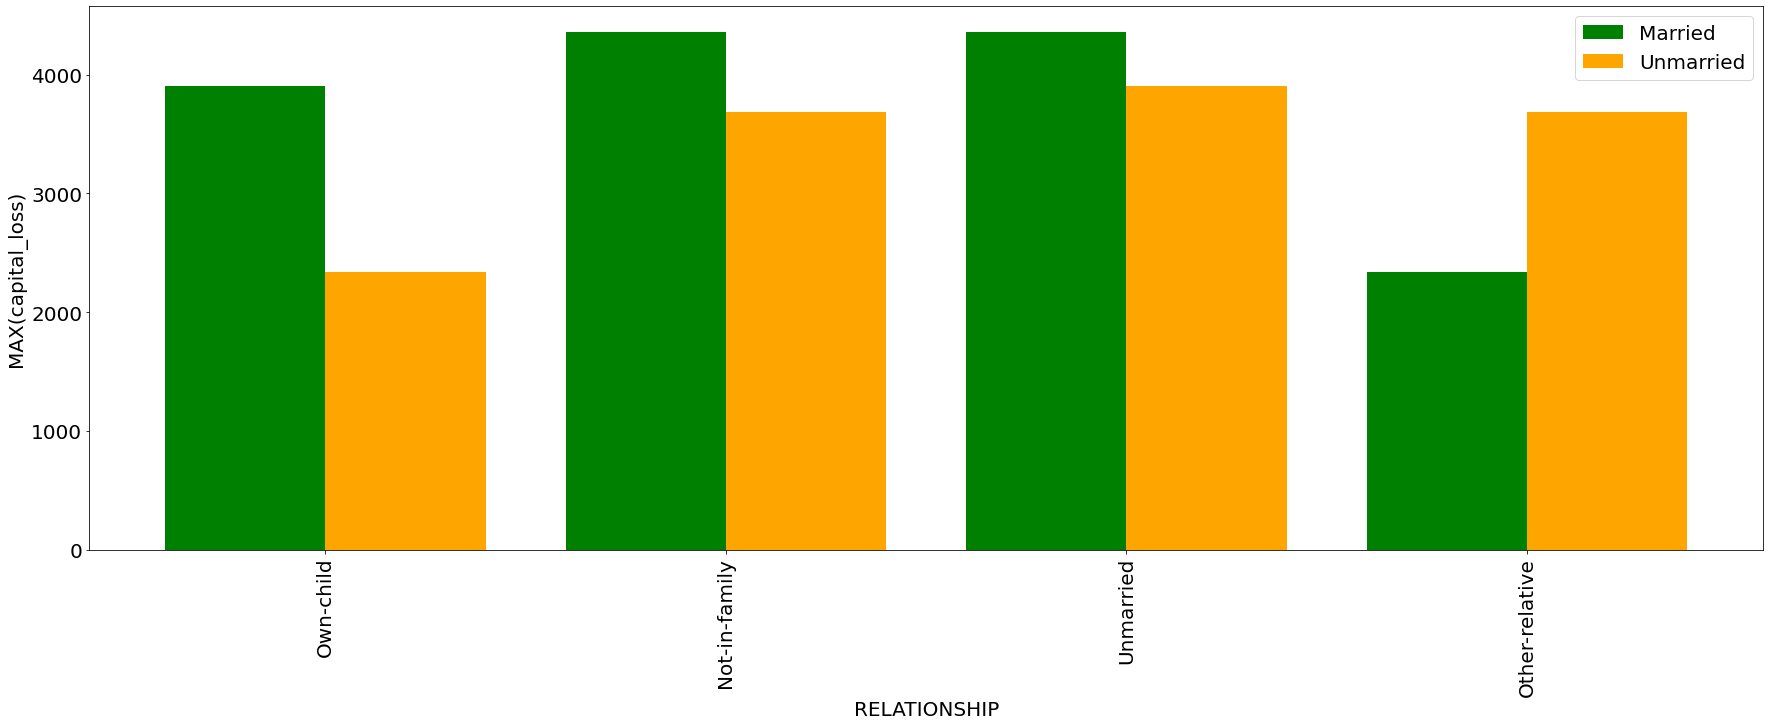


SELECT q1.aggregate, q1.val, q2.val from (
(SELECT relationship as aggregate, avg(capital_loss) as val from census_income.adult where marital_status in 
('Married-civ-spouse', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse', 'Separated') group by relationship) q1 
right outer join 
(SELECT relationship as aggregate, avg(capital_loss) as val from census_income.adult where marital_status in 
('Divorced','Never-married') group by relationship) q2
on q1.aggregate = q2.aggregate);



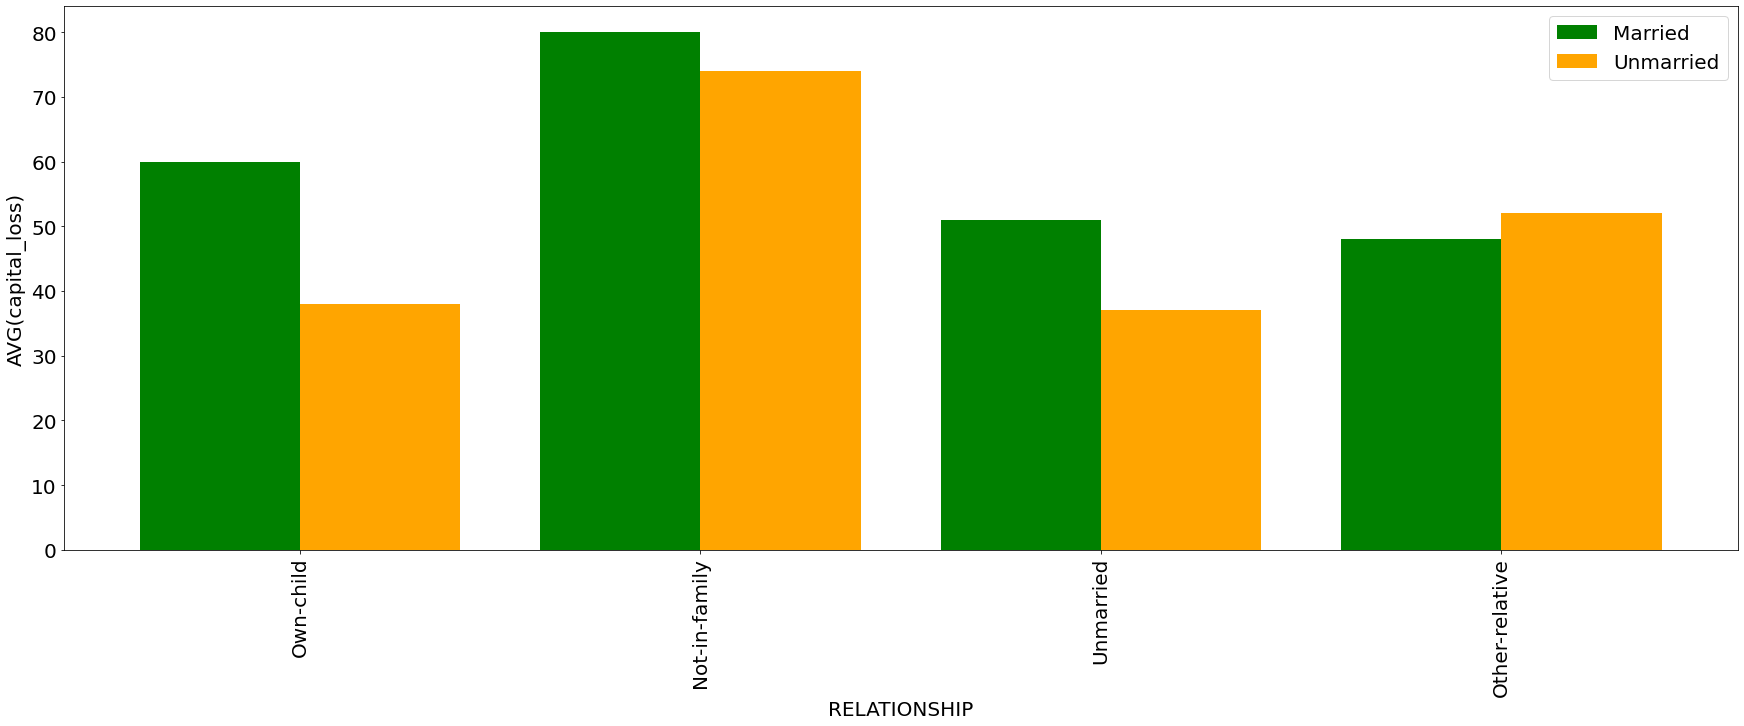

In [9]:
SQL_QUERY = """
SELECT q1.aggregate, q1.val, q2.val from (
(SELECT {} as aggregate, {} as val from census_income.adult where marital_status in 
('Married-civ-spouse', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse', 'Separated') group by {}) q1 
right outer join 
(SELECT {} as aggregate, {} as val from census_income.adult where marital_status in 
('Divorced','Never-married') group by {}) q2
on q1.aggregate = q2.aggregate);
"""
import database_connection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def generate_query(f,a,m):
    print(SQL_QUERY.format(a, f'{f}({m})', a, a, f'{f}({m})', a))
    return SQL_QUERY.format(a, f'{f}({m})', a, a, f'{f}({m})', a)
                            
def get_results(f,a,m):
    sql_query = generate_query(f,a,m)
    return database_connection.execute_query(sql_query)

def get_dataframe(f,a,m,result):
    res = pd.DataFrame(columns=['{}'.format(a), 'Marital_Status', '{}({})'.format(f.upper(),m)])
    for a, val_1, val_2 in result:
        res.loc[len(res)] = [a,'True', int(0 if val_1 is None else val_1)]
        res.loc[len(res)] = [a,'False', int(0 if val_2 is None else val_2)]
        
    res.fillna("0", inplace=True)
    return res

def generate_graph(f,a,m,result):
    #print(result)
    x = np.arange(1,(len(result))/2+1)
    width = 0.5
    plt.figure(figsize=(30,10))
    plt.bar(x-0.4, result[res['Marital_Status'] == 'True']['{}({})'.format(f.upper(),m)].to_list(), align='edge', width=0.4, color='green')
    plt.bar(x, result[res['Marital_Status'] == 'False']['{}({})'.format(f.upper(),m)].to_list(), align='edge', width=0.4, color='orange')
    plt.xticks(x, result[res['Marital_Status'] == 'False'][a].to_list())
    plt.xlabel(a.upper(),fontsize=20)
    plt.ylabel('{}({})'.format(f.upper(),m),fontsize=20)
    plt.legend(["Married","Unmarried"])
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 
    plt.rc('legend', fontsize=20)
    plt.xticks(rotation = 90)
    plt.show()

for k in top_k_interesting_visualizations.keys():
    f,a,m = k
    res = get_results(f,a,m)
    res = get_dataframe(f,a,m, res)
    generate_graph(f,a,m, res)
    
